In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df_with_texts.csv", index_col=0)

In [3]:
df = df.replace(r'\n',' ', regex=True)
df

,Person,Subcategory,Category,Text
104,Jeanette Epps,American astronauts,Astronauts,"Jeanette Jo Epps (born November 3, 1970) is an..."
288,Sergey Avdeev,Russian cosmonauts,Astronauts,Sergei Vasilyevich Avdeyev (Сергей Васильевич ...
198,Matthias Maurer,German astronauts,Astronauts,Matthias Josef Maurer (born 18 March 1970) is ...
365,Andriyan Nikolayev,Soviet cosmonauts,Astronauts,Andriyan Grigoryevich Nikolayev (Chuvash and R...
412,Gennady Manakov,Soviet cosmonauts,Astronauts,Gennady Mikhailovich Manakov (Russian: Геннади...
...,...,...,...,...
7053,Uhwudong,Korean writers,Writers,"Eowudong or Uhwudong (어우동, 於宇同; 1440 - 18 Octo..."
5383,Óttar M. Norðfjörð,Icelandic writers,Writers,Óttar Martin Norðfjörð (born 1980) is an Icela...
4093,Claude Phillips,English writers,Writers,Sir Claude Phillips (29 January 1846 – 9 Augus...
7477,Francis Moto,Malawian writers,Writers,Professor Francis P. B. Moto (born 1952) is a ...


In [4]:
#We use spacy for the Data Analysis 

import spacy 

nlp = spacy.load('en_core_web_sm')

# **Count sentences of each category**

In [5]:
def get_sentences(text):
    """
    This function takes a text as an input and return the a list of the sentences of the given text
    """
    doc = nlp(text)
    return list(doc.sents)

In [6]:
astronauts = df.loc[df['Category'] == 'Astronauts'] #subframe of astronauts 
astronauts

,Person,Subcategory,Category,Text
104,Jeanette Epps,American astronauts,Astronauts,"Jeanette Jo Epps (born November 3, 1970) is an..."
288,Sergey Avdeev,Russian cosmonauts,Astronauts,Sergei Vasilyevich Avdeyev (Сергей Васильевич ...
198,Matthias Maurer,German astronauts,Astronauts,Matthias Josef Maurer (born 18 March 1970) is ...
365,Andriyan Nikolayev,Soviet cosmonauts,Astronauts,Andriyan Grigoryevich Nikolayev (Chuvash and R...
412,Gennady Manakov,Soviet cosmonauts,Astronauts,Gennady Mikhailovich Manakov (Russian: Геннади...
...,...,...,...,...
120,James M. Taylor,American astronauts,Astronauts,"James Martin Taylor (November 27, 1930 – Septe..."
339,Mark Shuttleworth,South African astronauts,Astronauts,Mark Richard Shuttleworth (born 18 September 1...
5,Robert Hines (astronaut),American astronauts,Astronauts,"Robert Thomas Hines, Jr. (born January 11, 197..."
158,Dafydd Williams,Canadian astronauts,Astronauts,Dafydd Rhys Williams (alternately known as Dav...


In [7]:
writers = df.loc[df['Category'] == 'Writers'] #subframe of writers
writers

,Person,Subcategory,Category,Text
10112,Sagit Agish,Soviet writers,Writers,"Sagit Agish (1904–1973) was a Bashkir poet, wr..."
9851,Preller Geldenhuys,South African writers,Writers,(Prop) Preller Geldenhuys was a pilot in the R...
1005,Marcelo Kohen,Argentine writers,Writers,"Marcelo Gustavo Kohen (born August 11, 1957) i..."
6902,Masanobu Fukuoka,Japanese writers,Writers,"Masanobu Fukuoka (Japanese: 福岡 正信, Hepburn: Fu..."
9791,James Gregory (prison officer),South African writers,Writers,James Gregory (7 November 1941 – 2003) was the...
...,...,...,...,...
7053,Uhwudong,Korean writers,Writers,"Eowudong or Uhwudong (어우동, 於宇同; 1440 - 18 Octo..."
5383,Óttar M. Norðfjörð,Icelandic writers,Writers,Óttar Martin Norðfjörð (born 1980) is an Icela...
4093,Claude Phillips,English writers,Writers,Sir Claude Phillips (29 January 1846 – 9 Augus...
7477,Francis Moto,Malawian writers,Writers,Professor Francis P. B. Moto (born 1952) is a ...


In [8]:
writers["Sentences"] = writers['Text'].apply(get_sentences)#Aplly the function to the text colum and create a new column with the output
writers['Num_sentences'] = writers['Sentences'].apply(lambda x: len(x)) #Now we get the number of sentences of each article 

<ipython-input-8-aecb5e11d6da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers["Sentences"] = writers['Text'].apply(get_sentences)#Aplly the function to the text colum and create a new column with the output
<ipython-input-8-aecb5e11d6da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers['Num_sentences'] = writers['Sentences'].apply(lambda x: len(x)) #Now we get the number of sentences of each article


In [9]:
writers

,Person,Subcategory,Category,Text,Sentences,Num_sentences
10112,Sagit Agish,Soviet writers,Writers,"Sagit Agish (1904–1973) was a Bashkir poet, wr...","[(Sagit, Agish, (, 1904–1973, ), was, a, Bashk...",13
9851,Preller Geldenhuys,South African writers,Writers,(Prop) Preller Geldenhuys was a pilot in the R...,"[((, Prop, ), Preller, Geldenhuys, was, a, pil...",10
1005,Marcelo Kohen,Argentine writers,Writers,"Marcelo Gustavo Kohen (born August 11, 1957) i...","[(Marcelo, Gustavo, Kohen, (, born, August, 11...",40
6902,Masanobu Fukuoka,Japanese writers,Writers,"Masanobu Fukuoka (Japanese: 福岡 正信, Hepburn: Fu...","[(Masanobu, Fukuoka, (, Japanese, :, 福岡, 正信, ,...",171
9791,James Gregory (prison officer),South African writers,Writers,James Gregory (7 November 1941 – 2003) was the...,"[(James, Gregory, (, 7, November, 1941, –, 200...",29
...,...,...,...,...,...,...
7053,Uhwudong,Korean writers,Writers,"Eowudong or Uhwudong (어우동, 於宇同; 1440 - 18 Octo...","[(Eowudong, or, Uhwudong, (, 어우동, ,, 於宇同, ;, 1...",42
5383,Óttar M. Norðfjörð,Icelandic writers,Writers,Óttar Martin Norðfjörð (born 1980) is an Icela...,"[(Óttar, Martin, Norðfjörð, (, born, 1980, ), ...",30
4093,Claude Phillips,English writers,Writers,Sir Claude Phillips (29 January 1846 – 9 Augus...,"[(Sir, Claude, Phillips, (, 29, January, 1846,...",44
7477,Francis Moto,Malawian writers,Writers,Professor Francis P. B. Moto (born 1952) is a ...,"[(Professor, Francis, P., B., Moto, (, born, 1...",43


In [10]:
#We do the same with astronauts...

astronauts["Sentences"] = astronauts['Text'].apply(get_sentences)
astronauts['Num_sentences'] = astronauts['Sentences'].apply(lambda x: len(x))

<ipython-input-10-754b28f96a08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astronauts["Sentences"] = astronauts['Text'].apply(get_sentences)
<ipython-input-10-754b28f96a08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astronauts['Num_sentences'] = astronauts['Sentences'].apply(lambda x: len(x))


In [11]:
astronauts

,Person,Subcategory,Category,Text,Sentences,Num_sentences
104,Jeanette Epps,American astronauts,Astronauts,"Jeanette Jo Epps (born November 3, 1970) is an...","[(Jeanette, Jo, Epps, (, born, November, 3, ,,...",41
288,Sergey Avdeev,Russian cosmonauts,Astronauts,Sergei Vasilyevich Avdeyev (Сергей Васильевич ...,"[(Sergei, Vasilyevich, Avdeyev, (, Сергей, Вас...",28
198,Matthias Maurer,German astronauts,Astronauts,Matthias Josef Maurer (born 18 March 1970) is ...,"[(Matthias, Josef, Maurer, (, born, 18, March,...",31
365,Andriyan Nikolayev,Soviet cosmonauts,Astronauts,Andriyan Grigoryevich Nikolayev (Chuvash and R...,"[(Andriyan, Grigoryevich, Nikolayev, (, Chuvas...",52
412,Gennady Manakov,Soviet cosmonauts,Astronauts,Gennady Mikhailovich Manakov (Russian: Геннади...,"[(Gennady, Mikhailovich, Manakov, (, Russian, ...",8
...,...,...,...,...,...,...
120,James M. Taylor,American astronauts,Astronauts,"James Martin Taylor (November 27, 1930 – Septe...","[(James, Martin, Taylor, (, November, 27, ,, 1...",32
339,Mark Shuttleworth,South African astronauts,Astronauts,Mark Richard Shuttleworth (born 18 September 1...,"[(Mark, Richard, Shuttleworth, (, born, 18, Se...",44
5,Robert Hines (astronaut),American astronauts,Astronauts,"Robert Thomas Hines, Jr. (born January 11, 197...","[(Robert, Thomas, Hines, ,, Jr., (, born, Janu...",33
158,Dafydd Williams,Canadian astronauts,Astronauts,Dafydd Rhys Williams (alternately known as Dav...,"[(Dafydd, Rhys, Williams, (, alternately, know...",91


In [12]:
len(astronauts["Sentences"].iloc[0])

41

In [13]:
def calculate_stats(data):
    """
    This function takes a list of numbers as input, and returns a formatted string
    containing the minimum, maximum, and average values.
    """
    minimum = min(data)
    maximum = max(data)
    average = sum(data) / len(data)

    stats_str = f"This is the average: {average} \nThis is the maximum: {maximum} \nThis is the minimum: {minimum}"

    return stats_str

Stats for astronauts article length (in sentences):

In [14]:
print(calculate_stats(astronauts['Num_sentences']))

This is the average: 44.025 
This is the maximum: 324 
This is the minimum: 3


Stats for writers article length (in sentences):

In [15]:
print(calculate_stats(writers['Num_sentences']))

This is the average: 30.845 
This is the maximum: 267 
This is the minimum: 2


# Visualization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Histograms

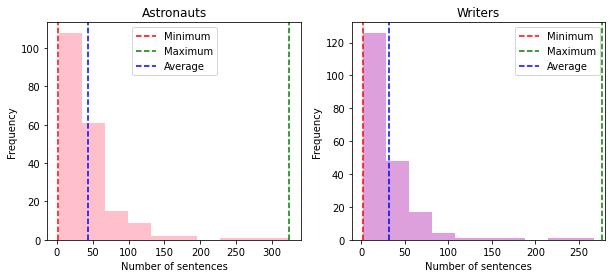

In [17]:
# Create a figure with two subplots, side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram on the left subplot
axs[0].hist(astronauts['Num_sentences'], bins=10,color='pink')
axs[0].axvline(x=2, color='r', linestyle='--', label='Minimum')
axs[0].axvline(x=324, color='g', linestyle='--', label='Maximum')
axs[0].axvline(x=44.25, color='b', linestyle='--', label='Average')
axs[0].set_title('Astronauts')

# Plot the second histogram on the right subplot
axs[1].hist(writers['Num_sentences'], bins=10, color = "plum")
axs[1].axvline(x=2, color='r', linestyle='--', label='Minimum')
axs[1].axvline(x=277, color='g', linestyle='--', label='Maximum')
axs[1].axvline(x=31.37, color='b', linestyle='--', label='Average')
axs[1].set_title('Writers')


# Set the x-axis and y-axis labels for both subplots
for ax in axs:
    ax.set_xlabel('Number of sentences')
    ax.set_ylabel('Frequency')
    ax.legend()

# Show the figure
plt.show()


### Boxplots

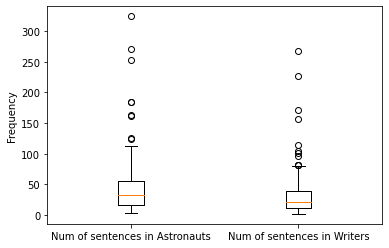

In [18]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the boxplots side-by-side using the "positions" parameter
ax.boxplot([astronauts['Num_sentences'], writers['Num_sentences']], positions=[1, 2])

# Set the labels and limits
ax.set_xticklabels(['Num of sentences in Astronauts', 'Num of sentences in Writers'])
ax.set_xlim(0.5, 2.5)
ax.set_ylabel('Frequency')

# Show the figure
plt.show()

## **Tokenization**

In [19]:
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_stop]

In [20]:
def tokenize_sentence(sentences):
    """
    We tokenize every sentence contain in the list of sentences of each row
    It returns a list of lists of tokens, each list is the tokens of a sentence
    """ 
    list_tokens = []
    for s in sentences:
        tokenized_sentences = tokenize_text(" ".join(str(s).split()))
        if tokenized_sentences:
            list_tokens.append(tokenized_sentences)

    return list_tokens

In [21]:
#We apply the the function tokenize_sentence to astronauts and create a new colum with the result
astronauts["tokenized_sentences"] = astronauts["Sentences"].apply(tokenize_sentence)
astronauts.to_csv('output_astronauts.csv', index=False)

<ipython-input-21-60ee6e6b95ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  astronauts["tokenized_sentences"] = astronauts["Sentences"].apply(tokenize_sentence)


In [22]:
#We apply the the function tokenize_sentence to writers and create a new colum with the result
writers["tokenized_sentences"] =writers["Sentences"].apply(tokenize_sentence) 

<ipython-input-22-db40daaeb631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers["tokenized_sentences"] =writers["Sentences"].apply(tokenize_sentence)


Now we count the number of tokens of each sentences and represent the output

In [23]:
def count_tokens(list_sentences):
    """
    This function returns a list of token counts for the sentences contained in
    the specified column.
    """
    # Create an empty list to store the token counts
    token_counts = []
    for sentence in list_sentences:
        token_counts.append(len(sentence))

    # Return the token counts as a list
    return token_counts

In [24]:
#we count the tokens of each sentence

tokens_per_sentence_wr = writers["tokenized_sentences"].apply(count_tokens)
tokens_per_sentence_as = astronauts["tokenized_sentences"].apply(count_tokens)

In [25]:
#We count the total tokens of each row

total_wr= tokens_per_sentence_wr.apply(lambda x: sum(x))
total_as= tokens_per_sentence_as.apply(lambda x: sum(x))

The stats for token count per article for `Writers`:

In [26]:
#We get the min, max and avg
print(calculate_stats(total_wr))

This is the average: 355.71 
This is the maximum: 3680 
This is the minimum: 13


The stats for token count per article for `Astronauts`:

In [27]:
print(calculate_stats(total_as))

This is the average: 557.93 
This is the maximum: 4452 
This is the minimum: 33


# **Visualization**

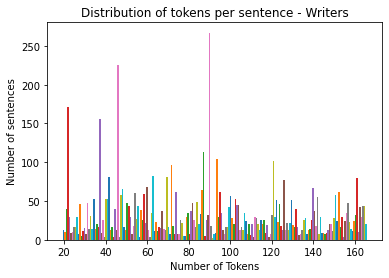

In [28]:
#Histogram of tokens per sentence - Writers

plt.hist(tokens_per_sentence_wr, bins=1)

# Add labels and a title to the plot
plt.xlabel("Number of Tokens")
plt.ylabel("Number of sentences")
plt.title("Distribution of tokens per sentence - Writers")

# Show the plot
plt.show()

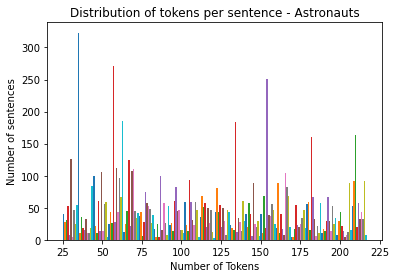

In [29]:
#Histogram of tokens per sentence - Astronauts

plt.hist(tokens_per_sentence_as, bins=1)

# Add labels and a title to the plot
plt.xlabel("Number of Tokens")
plt.ylabel("Number of sentences")
plt.title("Distribution of tokens per sentence - Astronauts")

# Show the plot
plt.show()

Histograms of tokens per category

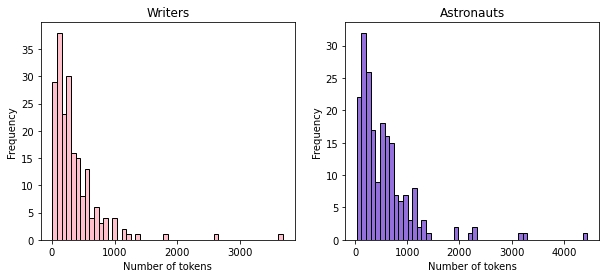

In [30]:
# Create a figure with two subplots, side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram on the left subplot
axs[0].hist(total_wr, bins=50,color='pink',edgecolor='black')
axs[0].set_title('Writers')

# Plot the second histogram on the right subplot
axs[1].hist(total_as, bins=50, color = "mediumpurple",edgecolor='black')
axs[1].set_title('Astronauts')


# Set the x-axis and y-axis labels for both subplots
for ax in axs:
    ax.set_xlabel('Number of tokens')
    ax.set_ylabel('Frequency')

# Show the figure
plt.show()

# **Name entity recognition**

In [31]:
def get_entities(text):
    """
    We create a function to extract the entities from a text
    """
    list_entities= []
    for ent in nlp(text).ents:
        list_entities.append(ent.label_)
    return(list_entities)

In [32]:
#We apply it to the column text of the dataset

entities_as = astronauts["Text"].apply(get_entities)
entities_wr = writers["Text"].apply(get_entities)

In [33]:
from spacy import displacy

#we can dispay the entities to see them more clearly. To show an example we display the entities of one text

displacy.render(nlp(astronauts["Text"].iloc[12]), style='ent', jupyter=True) 

In [34]:
#We make a list of the total entities. Entities_as and entities_wr are arrays of Pandas Series of arrays, 
# so we'll use numpy.concatenate to flatten it to a 1-dimensional array.

list_entities_as = np.concatenate(list(entities_as))
list_entities_wr = np.concatenate(list(entities_wr))

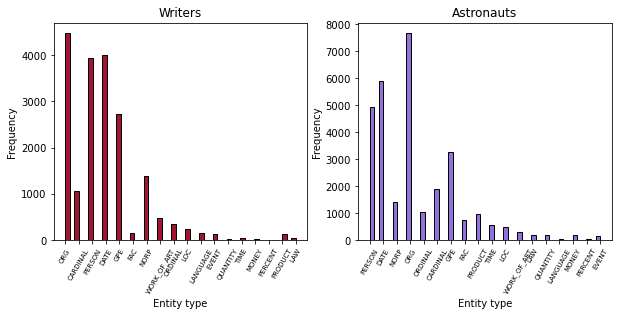

In [53]:
#Finally we display a histogram of the number of entities recognized in each category

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram on the left subplot
axs[0].hist(list_entities_wr, bins=50,color="#A2142F",edgecolor='black')
axs[0].set_title('Writers')

# Plot the second histogram on the right subplot
axs[1].hist(list_entities_as, bins=50, color = "mediumpurple",edgecolor='black')
axs[1].set_title('Astronauts')



# Set the x-axis and y-axis labels and parameters for both subplots
for ax in axs:
    ax.set_xlabel('Entity type')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', labelsize=7, rotation=60)

# Show the figure
plt.show()

In [61]:
wr_ner_labels, wr_ner_counts = np.unique(list_entities_wr, return_counts=True)

wr_ner_df = pd.DataFrame(columns=['NER', 'Count'])
wr_ner_df.NER = wr_ner_labels
wr_ner_df.Count = wr_ner_counts

wr_ner_df.sort_values(by='Count', ascending=False).head(5)

,NER,Count
11,ORG,4479
1,DATE,4015
13,PERSON,3945
4,GPE,2731
9,NORP,1391


In [64]:
as_ner_labels, as_ner_counts = np.unique(list_entities_as, return_counts=True)

as_ner_df = pd.DataFrame(columns=['NER', 'Count'])
as_ner_df.NER = as_ner_labels
as_ner_df.Count = as_ner_counts

as_ner_df.sort_values(by='Count', ascending=False).head(5)

,NER,Count
11,ORG,7681
1,DATE,5900
13,PERSON,4939
4,GPE,3287
0,CARDINAL,1896
